# Titanic


Here I will analysing the Titanic disaster, using Python, including Pandas, NumPy, Sci-kit Learn libraries.
Dataset was takken from Kaggle competition, you can find it by following the link 'https://www.kaggle.com/c/titanic/overview'
According the data discription, collumns SibSp contains value of of siblings / spouses aboard the Titanic, parch contains value of parents / children aboard the Titanic. The Embarked column discibes the Port of Embarkation. At first sight, I`m not sure that place, where you come aboard the ship, can impact your safety. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./train.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S


In [3]:
data.shape

(891, 12)

We need to count all the NaNs in convient form

In [4]:
counts_nans = pd.DataFrame(data.isna().sum(), columns=['NaNs'])
percent_nans = pd.DataFrame(((data.isna().mean()) * 100), columns=['percent of total'])
percent_of_nans_data = pd.concat([counts_nans, percent_nans], axis=1)

In [5]:
percent_of_nans_data

,NaNs,percent of total
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


## Cabin
Cabin column has a very big amount of NaNs, it can be dropped

In [6]:
data.drop(columns='Cabin' ,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Embarked

At the abstract I Said that I`m not sure Embarked feature affects the survival rates, and now we can take a look on it.

In [7]:
data[['Embarked', 'Survived']].groupby(by='Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


My assumption was wrong, the "C" port has the best survival rates compare to the other

In [8]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


The both persons from unknown Embarked port are female and alive. They have the same ticket number, but they are not relatives.

In [9]:
data['Embarked'].fillna('C', inplace=True)

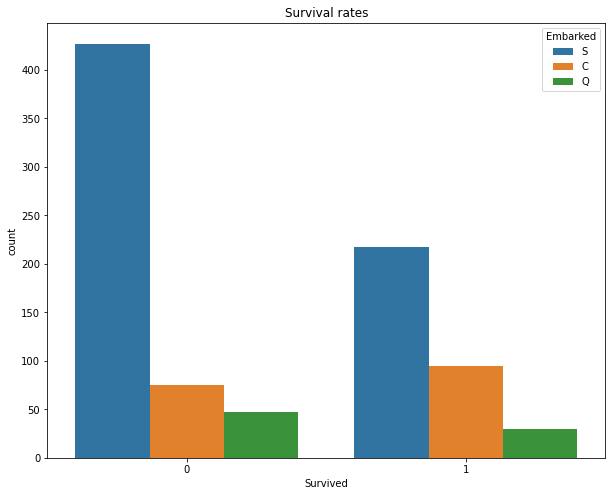

In [10]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Survived', hue='Embarked')
plt.title("Survival rates")
plt.show()

# Sex

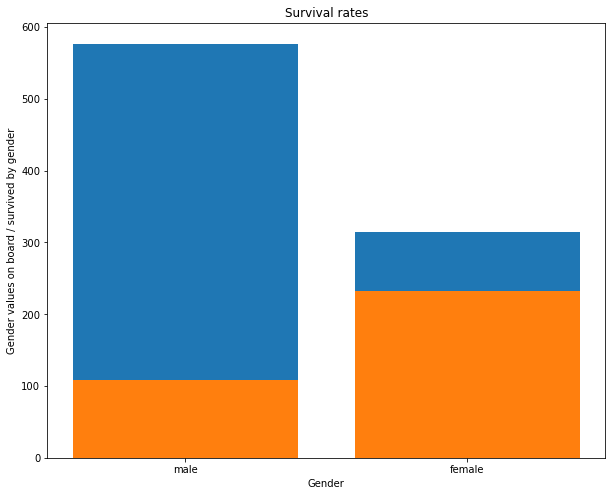

In [57]:
plt.figure(figsize=(10, 8))
rect1 = plt.bar(list(set(data['Sex'].values)), data['Sex'].value_counts())
rect2 = plt.bar(sorted(list(set(data['Sex'].values))), data['Sex'][data['Survived'] == 1].value_counts())
plt.ylabel('Gender values on board / survived by gender')
plt.xlabel('Gender')
plt.title('Survival rates')
plt.show()

## Age

Let`s fill the NaN of the Age column. Here I want to  separate ages by groups. 
First group will be persons who was traveling alone. If person was alone on board, 
I will fill NaNs with mean age of solo-travellers. 
For families I will take the dependence of age with respect to number of family members

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
data.loc[(data['SibSp'] == 0) & (data['Parch'] == 0), 'Alone'] = 1
data.loc[(data['SibSp'] != 0) | (data['Parch'] != 0), 'Alone'] = 0
data.Alone.astype('int')

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Alone, Length: 891, dtype: int32

In [180]:
data.loc[data.Age.isnull() & (data['Alone'] == 1), 'Age'] = np.round(data[data['Alone'] == 1].Age.median())

In [ ]:
Need to add age value for not alone persons on board. Maybe separate by gender